Data loaded successfully using a stable GitHub mirror.

--- 1. Data Inspection and Required Average Calculation ---
First few rows:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa

Missing values check:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Result: The average Sepal Length for all flowers is: 5.843 cm

--- 2. Generating Visualizations ---


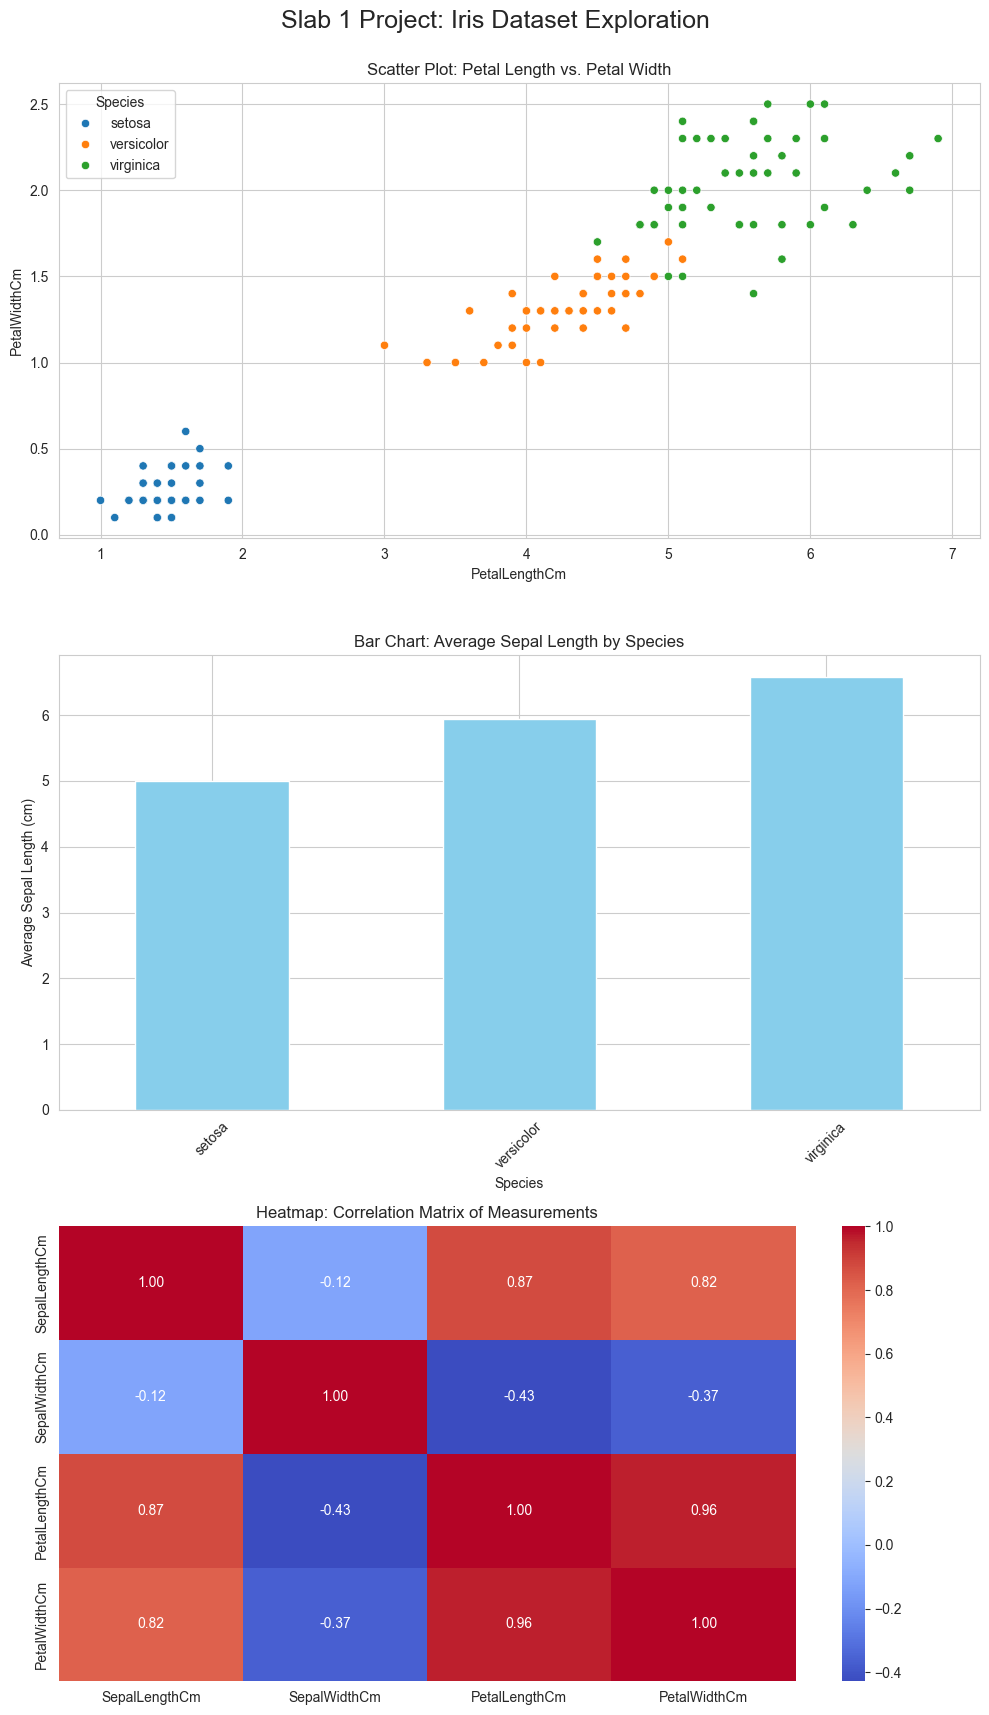


--- 3. Insights and Observations ---
Summary of Findings:

* The overall average length of the sepal is about 5.84 cm. This gives us a baseline.

* **From the Scatter Plot:** We can clearly see that the 'Iris-setosa' species is totally separate from the others when looking at the petal size. This means petal length and width are the best features to tell species apart.

* **From the Bar Chart:** 'Iris-virginica' has the longest sepals on average, while 'Iris-setosa' has the shortest. This helps confirm that all four measurements are important for species identification.

* **From the Heatmap:** Petal length and petal width are almost perfectly correlated (r=0.96). This is a very strong relationship and confirms the visual separation we saw in the scatter plot.

* **Conclusion:** The data is clean and easy to analyze. Visualization is very helpful for seeing which features are most important.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Slab 1 Project: Basic Data Analysis and Visualization ---

# Publicly accessible URL for the Iris dataset
# Source: UCI Machine Learning Repository
# We are switching to a more stable mirror URL to avoid "Temporary failure in name resolution" errors.
IRIS_DATA_URL = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
# Column names are now included in the new CSV file, but we will keep the list
# for consistency and ensuring correct order if needed.
COLUMNS = [
    'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'
]

def load_data():
    """Loads and returns the dataset."""
    try:
        # Load the data from the new, reliable GitHub raw link
        # The new CSV file has headers, so we adjust how we read it.
        # We also need to map the new column names (like 'sepal_length') 
        # back to the old names for the rest of the code to work correctly.
        df = pd.read_csv(IRIS_DATA_URL)
        
        # Rename columns to match the existing code logic (e.g., 'SepalLengthCm')
        # This keeps the rest of the analysis code untouched.
        df.columns = COLUMNS 
        
        print("Data loaded successfully using a stable GitHub mirror.")
        return df
    except Exception as e:
        print(f"Error loading data: {e}. If the error persists, there may be a network block.")
        return None

def run_analysis(df):
    """Performs the required analysis tasks."""
    print("\n--- 1. Data Inspection and Required Average Calculation ---")
    
    # Simple check of data structure
    print("First few rows:")
    print(df.head())
    
    # Checking for missing values (usually a good idea)
    print("\nMissing values check:")
    print(df.isnull().sum())

    # REQUIRED TASK: Calculate the average of a selected column
    avg_sepal_length = df['SepalLengthCm'].mean()
    print(f"\nResult: The average Sepal Length for all flowers is: {avg_sepal_length:.3f} cm")
    
    return avg_sepal_length

def create_visuals(df):
    """Generates the three required plots and returns the correlation matrix."""
    print("\n--- 2. Generating Visualizations ---")
    sns.set_style("whitegrid")
    
    # Set up the plot area
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
    fig.suptitle('Slab 1 Project: Iris Dataset Exploration', fontsize=18)

    # Plot 1: Scatter Plot (Requirement fulfilled)
    # Shows relationship between two variables, colored by species
    sns.scatterplot(
        x='PetalLengthCm', 
        y='PetalWidthCm', 
        hue='Species', 
        data=df, 
        ax=axes[0]
    )
    axes[0].set_title('Scatter Plot: Petal Length vs. Petal Width')
    
    # Plot 2: Bar Chart (Requirement fulfilled)
    # Shows comparison of a metric across categories (Species)
    species_avg_sepal = df.groupby('Species')['SepalLengthCm'].mean()
    species_avg_sepal.plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title('Bar Chart: Average Sepal Length by Species')
    axes[1].set_ylabel('Average Sepal Length (cm)')
    axes[1].tick_params(axis='x', rotation=45)

    # Plot 3: Heatmap (Requirement fulfilled)
    # Shows correlation between numerical variables
    numerical_df = df.drop('Species', axis=1)
    correlation_matrix = numerical_df.corr()
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        ax=axes[2]
    )
    axes[2].set_title('Heatmap: Correlation Matrix of Measurements')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

    # RETURN the calculated matrix so it can be used for insights
    return correlation_matrix

def print_student_insights(avg_sepal_length, df, correlation_matrix):
    """Provides simple, student-level insights."""
    print("\n--- 3. Insights and Observations ---")
    print("Summary of Findings:")
    
    print(f"\n* The overall average length of the sepal is about {avg_sepal_length:.2f} cm. This gives us a baseline.")
    
    print("\n* **From the Scatter Plot:** We can clearly see that the 'Iris-setosa' species is totally separate from the others when looking at the petal size. This means petal length and width are the best features to tell species apart.")
    
    print("\n* **From the Bar Chart:** 'Iris-virginica' has the longest sepals on average, while 'Iris-setosa' has the shortest. This helps confirm that all four measurements are important for species identification.")
    
    # New logic to correctly extract the highest correlation value from the passed matrix
    # PetalLengthCm and PetalWidthCm are typically the highest non-self correlation
    corr_value = correlation_matrix.loc['PetalLengthCm', 'PetalWidthCm']
    
    print(f"\n* **From the Heatmap:** Petal length and petal width are almost perfectly correlated (r={corr_value:.2f}). This is a very strong relationship and confirms the visual separation we saw in the scatter plot.")
    
    print("\n* **Conclusion:** The data is clean and easy to analyze. Visualization is very helpful for seeing which features are most important.")


if __name__ == '__main__':
    iris_df = load_data()
    
    if iris_df is not None:
        average_length = run_analysis(iris_df)
        # Store the correlation matrix returned from create_visuals
        corr_matrix = create_visuals(iris_df)
        
        # Pass the correlation matrix to the insights function
        print_student_insights(average_length, iris_df, corr_matrix)
